# PAUTA 
# Tarea 1 Estadística para Data Science: Análisis Exploratorio de Datos


# 0. Cargando librerías 
Carga las librerías que necesitarás

In [1]:
import pandas as pd

%matplotlib inline

import seaborn as sns
import matplotlib.pylab as plt

# 1. Wildcats:
El equipo de futbol americano de los Wildcats de Arizona juega 12 partidos en la temporada regular cada año. El dataset `uafootball` contiene la diferencia en el marcador en cinco temporadas, desde 2014 hasta 2018.

## 1.1 Carga el siguiente dataset ubicado en: http://math.arizona.edu/~jwatkins/uafootball.csv

In [2]:
# escribe aquí el código para 1.1
uafootball = pd.read_csv('http://math.arizona.edu/~jwatkins/uafootball.csv')
uafootball

,f14,f15,f16,f17,f18
0,45,10,-2,38,-5
1,3,22,10,-3,-27
2,7,54,21,47,31
3,4,-26,-7,-6,21
4,7,-38,-21,3,-4
5,-2,37,-13,17,7
6,22,7,-34,1,-32
7,-10,-3,-24,21,-1
8,18,-46,-62,-14,29
9,1,-8,-25,21,8


## 1.2 Contesta las siguientes preguntas

¿Cuántos partidos ganaron los Wildcats cada año? 



In [3]:
# código para 1.2
'''
Los wildcats juegan 12 partidos por año, y en cada columna, los wildcats ganaron el partido
 cuando la diferencia es positiva (mayor que cero) y pierden cuando es negativa. 
'''
# Por lo tanto, durante la temporada 2014 tenemos 10 partidos ganados
sum(uafootball['f14']>0)


10

In [4]:
# temporada 2015
print(sum(uafootball['f15']>0))
# temporada 2016
print(sum(uafootball['f16']>0))
# temporada 2017
print(sum(uafootball['f17']>0))
# temporada 2018
print(sum(uafootball['f18']>0))

6
3
7
5


In [5]:
# otra forma, usando el método agg
uafootball.agg(lambda x: sum(x>0))

f14    10
f15     6
f16     3
f17     7
f18     5
dtype: int64

## 1.2 Respuesta

Los Wildcats ganaron los siguientes partidos en cada año:

* 2014: 10
* 2015: 6
* 2016: 3
* 2017: 7
* 2018: 5


## 1.3 Da un resumen de 5 números (mínimo, 1er cuartil, mediana, 3er cuartil, máximo) para la diferencia en el marcador de cada año.


In [6]:
# Al ejecutar el método min sobre el dataframe completo, el método calcula el mínimo sobre cada columna
uafootball.min()

f14   -10
f15   -46
f16   -62
f17   -20
f18   -41
dtype: int64

In [7]:
uafootball.quantile(0.25)

f14     2.50
f15   -17.75
f16   -25.00
f17    -7.50
f18   -10.50
Name: 0.25, dtype: float64

In [8]:
uafootball.median()

f14     7.0
f15     2.0
f16   -17.0
f17     2.0
f18    -1.0
dtype: float64

In [9]:
uafootball.quantile(0.75)

f14    19.00
f15    13.00
f16     1.00
f17    21.00
f18    11.25
Name: 0.75, dtype: float64

In [10]:
uafootball.max()

f14    45
f15    54
f16    21
f17    47
f18    31
dtype: int64

In [11]:
# Para presentar todo en una sola tabla:

resumen = pd.DataFrame(data = {"minimo" : uafootball.min(), "primer_cuartil": uafootball.quantile(0.25),
                               "mediana": uafootball.median(),"tercer_cuartil": uafootball.quantile(0.75),
                               "maximo": uafootball.max()} )
print(resumen)



     minimo  primer_cuartil  mediana  tercer_cuartil  maximo
f14     -10            2.50      7.0           19.00      45
f15     -46          -17.75      2.0           13.00      54
f16     -62          -25.00    -17.0            1.00      21
f17     -20           -7.50      2.0           21.00      47
f18     -41          -10.50     -1.0           11.25      31


## 1.4 Grafica un side-by-side boxplot de la diferencia en el marcador para las cinco temporadas


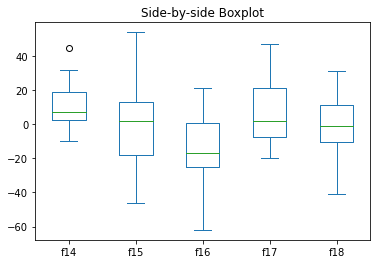

In [12]:
# Graficando el dataframe (todas las columnas)
ax = uafootball.plot(kind='box', title='Side-by-side Boxplot' )

# Muestra el gráfico
plt.show()

## 1.5 Calcula el promedio y la desviación estándar insesgada y sesgada, en la diferencia en el marcador en cada una de las cinco temporadas. 


In [13]:
# Promedio
uafootball.mean()

f14    11.166667
f15     0.083333
f16   -13.416667
f17     7.750000
f18    -1.250000
dtype: float64

In [14]:
# desviación estándar insesgada
uafootball.std()

f14    15.485086
f15    29.389108
f16    23.952447
f17    21.102025
f18    22.990611
dtype: float64

In [15]:
# para la desviación estándar sesgada (Dividiendo por N en vez de N-1), 
# en la documentación de pandas.DataFrame.std el argumento ddof está por defecto en ddof=1,
# si lo hacemos igual a cero, tenemos la desviación estándar que resulta de calcular la varianza dividiendo por N.

uafootball.std(ddof=0)


f14    14.825841
f15    28.137929
f16    22.932722
f17    20.203651
f18    22.011834
dtype: float64

## 1.6 Calcula el promedio y la desviación estándar sesgada e insesgada en la diferencia en el marcador de cada una de las cinco temporadas si sacamos el primer y el último juego de cada temporada.


In [16]:
# Para sacar el primer y último juego, sacamos la primera fila (la fila 0, ya que en python se parte de cero),
# y la última fila, usando el método iloc
uafootball_trim = uafootball.iloc[1:11]

In [17]:
uafootball_trim

,f14,f15,f16,f17,f18
1,3,22,10,-3,-27
2,7,54,21,47,31
3,4,-26,-7,-6,21
4,7,-38,-21,3,-4
5,-2,37,-13,17,7
6,22,7,-34,1,-32
7,-10,-3,-24,21,-1
8,18,-46,-62,-14,29
9,1,-8,-25,21,8
10,32,7,-25,-20,-41


In [18]:
# promedio
uafootball_trim.mean()

f14     8.2
f15     0.6
f16   -18.0
f17     6.7
f18    -0.9
dtype: float64

In [19]:
# Desviación estándar insesgada (dividida por n-1)
uafootball_trim.std()

f14    12.416834
f15    31.924216
f16    23.060307
f17    19.950216
f18    25.383503
dtype: float64

In [20]:
# Desviación estándar sesgada
uafootball_trim.std(ddof=0)

f14    11.779643
f15    30.285970
f16    21.876928
f17    18.926437
f18    24.080905
dtype: float64

## 1.7 Averigua alguna manera (cualquiera, preferentemente con python pero otra forma es aceptable) de agregar las diferencias en el marcador de las cinco temporadas en una sola variable, explica como lo hiciste y grafica un histograma de esta nueva variable.

## 1.7 Respuesta

In [21]:
# Existen muchas formas de crear esta variable única que tenga las diferencias en 
# el marcador durante las cinco temporadas.
# una forma directa es usando el método melt de pandas 
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html

five_season_scores = uafootball.melt()
print(five_season_scores)

   variable  value
0       f14     45
1       f14      3
2       f14      7
3       f14      4
4       f14      7
5       f14     -2
6       f14     22
7       f14    -10
8       f14     18
9       f14      1
10      f14     32
11      f14      7
12      f15     10
13      f15     22
14      f15     54
15      f15    -26
16      f15    -38
17      f15     37
18      f15      7
19      f15     -3
20      f15    -46
21      f15     -8
22      f15      7
23      f15    -15
24      f16     -2
25      f16     10
26      f16     21
27      f16     -7
28      f16    -21
29      f16    -13
30      f16    -34
31      f16    -24
32      f16    -62
33      f16    -25
34      f16    -25
35      f16     21
36      f17     38
37      f17     -3
38      f17     47
39      f17     -6
40      f17      3
41      f17     17
42      f17      1
43      f17     21
44      f17    -14
45      f17     21
46      f17    -20
47      f17    -12
48      f18     -5
49      f18    -27
50      f18     31
51      f18 

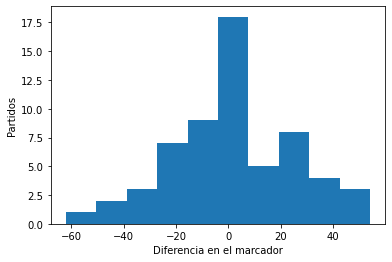

In [22]:

# Añadir labels

plt.xlabel('Diferencia en el marcador')
plt.ylabel('Partidos')
plt.hist(five_season_scores['value'] )
plt.show()


-70 60


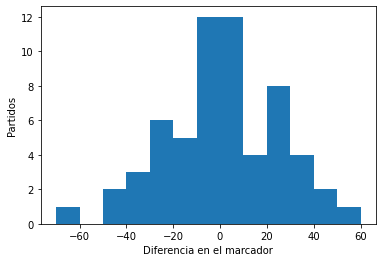

In [23]:
# Creando un rango para los bins
binwidth = 10 
max_bin = (round(max(five_season_scores['value'])/binwidth)+1)*binwidth
min_bin = (round(min(five_season_scores['value'])/binwidth) - 1)*binwidth

print(min_bin,max_bin)
bins = range(min_bin, max_bin + binwidth, binwidth)
plt.xlabel('Diferencia en el marcador')
plt.ylabel('Partidos')
plt.hist(five_season_scores['value'],bins )
plt.show()


## 1.8 Escribe en no más de 200 palabras como le ha ido a los Wildcats en estas cinco temporadas. Puedes usar resultados de las preguntas anteriores

## 1.8: Respuesta

En general, los Wildcats han tenido un rendimiento irregular en estas cinco temporadas, con una tendencia a la baja.Al ir año a año desde el 2014 al 2018, podemos ver que el 2014 es el año con mejor rendimiento. Se ganaron 10 partidos, la mayor cantidad de triunfos durante estas cinco temporadas y se tiene el mayor promedio de diferencia en el marcador. La desviación estándar es la más baja de las cinco temporadas, lo que indica que hay poca dispersión respecto al promedio de diferencia en el marcador, que fue también el más alto.

Luego, viene una tendencia negativa, donde el 2015 el promedio del marcador sigue siendo positivo pero muy cercano a cero, y se ganan solo 6 partidos. El 2016 es el año de peor rendimiento, donde al revisar la mediana vemos que está en -17, es decir, en la mitad de los juegos quedaron con un marcador con 17 goles en contra o peor, ganando solo 3 de sus 14 partidos.

El 2017 hay un repunte, ganando 7 partidos (50% de los partidos jugados), con un promedio de diferencia en el marcador de 7.75. Pero el 2018, el rendimiento vuelve a bajar, con un promedio de diferencia en el marcador negativo y solo cinco partidos ganados.

## 2: Licencias Médicas 2019 y 2020

Ingresa a la dirección https://www.suseso.cl/608/w3-propertyvalue-10364.html y descarga los archivos Estadísticas Nacionales de LM y SIL 2020 y Estadísticas Nacionales de LM y SIL 2019.

## 2.1
¿En qué extensión están los archivos? 
¿Cuál es el método en pandas para leer archivos de esta extensión?
Indica el link de la documentación oficial de Pandas para este método.

## 2.1 Respuesta
Están en extensión xlsx. El método de pandas para leer archivos xlsx es `pandas.read_excel` y el link a la documentación es https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

## 2.2 

Haz una exploración inicial (solo mirar) de ambos archivos (lo puedes hacer en Excel). 
Anda al cuadro 5.1.1.1 de ambos años. 
¿Qué gran diferencia existe entre las categorías?



## 2.2 Respuesta

El año 2020 se agregan dos categorías nuevas, Licencia Médica Preventiva Parental y **COVID-19**.

## 2.3
En base a este evento excepcional, 
a) ¿deberíamos esperar una gran diferencia entre la cantidad de licencias médicas tramitadas, y la cantidad de licencias médicas pagadas en el año 2019 versus el año 2020? ¿Por qué? ¿Cuál es esta diferencia? ¿Te parece una gran diferencia? ¿Cómo podríamos comparar de mejor manera esta diferencia si descargaramos los datos del año 2018?
b) ¿Cuál es la diferencia entre las licencias médicas tramitadas, y las licencias médicas pagadas en el año 2019 versus el año 2020? ¿Qué te parecen estas diferencias?  


## Respuesta 2.3

**a)** Si bien no existe exactamente un indicador de licencias médicas pagadas sino días de licencia pagados, entenderemos las licencias médicas pagadas como las autorizadas.  En principio podríamos pensar que, a un primer orden, debería haber un aumento de licencias tanto tramitadas como autorizadas por un evento altamente disruptivo como una pandemia de un virus altamente contagioso como el covid, y donde además sabemos que se tomaron medidas especiales para otorgar licencias no solo por el contagio comprobado con un test sino por aislamiento (cuarentena) por contacto estrecho. El 2019 no solo la categoría formal sino el fenómeno en sí sencillamente no existía, por tanto uno podría esperar que, más allá de hipotetizar cuánto podría ser la fluctuación entre dos años cualquiera (que a primer orden no debería ser mucha), debería haber un aumento sustantivo de licencias tramitadas el 2020 en comparación con el 2019. La diferencia total de licencias tramitadas es de :
* 2019: 6150303
* 2020: 6034360

Esto es bien sorprendente, ¡en total, hay incluso menos licencias el 2020 en relación al 2019!, una disminución del 1,88%.
Podríamos ver, a primer orden, si esta diferencia es comparable a la de otros años, comparando la diferencia entre 2018 y 2019. El 2018, en total, fueron tramitadas 5890955 licencias, con lo cual entre 2018 y 2019 hubo un aumento de 4,4% en las licencias, con lo que podríamos pensar que la disminución de 1,8% sería aún más anómala.  Todo esto puede verse en el cuadro 2.1.1 del documento del año 2020. Se puede ver también en este mismo cuadro el desglose entre previsión (isapre y fonasa), lo cual abre otras hipótesis y preguntas.

**b)**
El cuadro 3.1.1 tiene las licencias médicas autorizadas (las tramitadas que fueron autorizadas, más las rechazadas de isapres que fueron reclamadas y acogidas total o parcialmente), acá el año 2019 se autorizaron 6327872 licencias y el 2020 se autorizaron 5912948 licencias, por tanto se da otro resultado bastante no trivial a un primer orden: el 2019 y todos los años anteriores hay más licencias autorizadas que tramitadas, básicamente tomando el efecto grande de las isapres agregando licencias autorizadas que fueron previamente rechazadas y reclamadas, y con fonasa siempre teniendo mas licencias tramitadas que aceptadas, pero en una diferencia menor. En el año 2020 en cambio, fonasa aparece con una diferencia mayor, y las isapres con una diferencia menor. 

Otra comparación pertinente (y probablemente más interesante y/o explicativa) es comparar no la cantidad de licencias sino de días de licencia.  Al hacer una comparación rápida entre 2019 y 2020, en los cuadros 5.2.1.1 tenemos que el 2019 hubo en total 77603153 días otorgados y el 2020 93325222, lo cual es una diferencia de ¡16 millones de días!, que irían mucho más acorde a nuestra primera hipótesis de pandemia. Al ver como se distribuyen los tipos de diagnósticos, COVID-19 agrega 7,35 millones de días, por tanto es un aporte importante pero de hecho no el mayor, el cual es en salud mental, con un aumento de aproximadamente 8,5 millones de días. Al ver los días pagados (6.2.1.1), vemos que la diferencia de 16 millones se reduce a 5 millones.



## 2.4 
Nombra tres diferencias entre el 2019 y el 2020 que te parezcan interesantes de explorar en este dataset.

Esta pregunta es abierta, algunos ejemplos:

* Diferencias en diagnósticos de traumatismos entre 2019 y 2020, uno podría hipotetizar que al haber mucho menos desplazamiento y actividad física el 2020 hubo menos accidentes y eso provocó una baja.
*  Diferencia en diagnósticos de trastornos mentales para personas sobre 65 años entre 2019 y 2020
* Diferencia en diagnósticos en trastornos mentales entre hombres y mujeres entre 2019 y 2020.

